In [46]:
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.datasets import mnist

# 1. Загрузка данных

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Размер тренировачной выборки:', len(x_train))
print('Размер тестовой выборки:', len(x_test))

Размер тренировачной выборки: 60000
Размер тестовой выборки: 10000


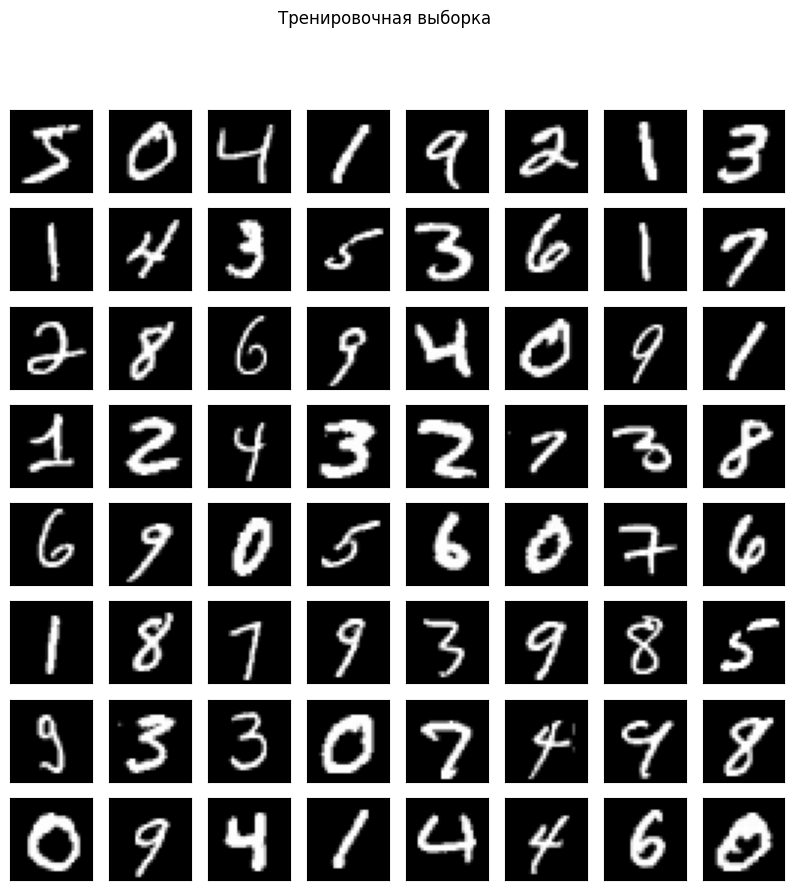

In [48]:
fig, axes = plt.subplots(8, 8, figsize = (10, 10))
fig.suptitle('Тренировочная выборка')
plt.setp(plt.gcf().get_axes(), xticks = [], yticks = [])
for i, ax in enumerate(axes.flat):
    img = x_train[i]
    ax.imshow(img, cmap = 'gray', vmin=0, vmax=255)

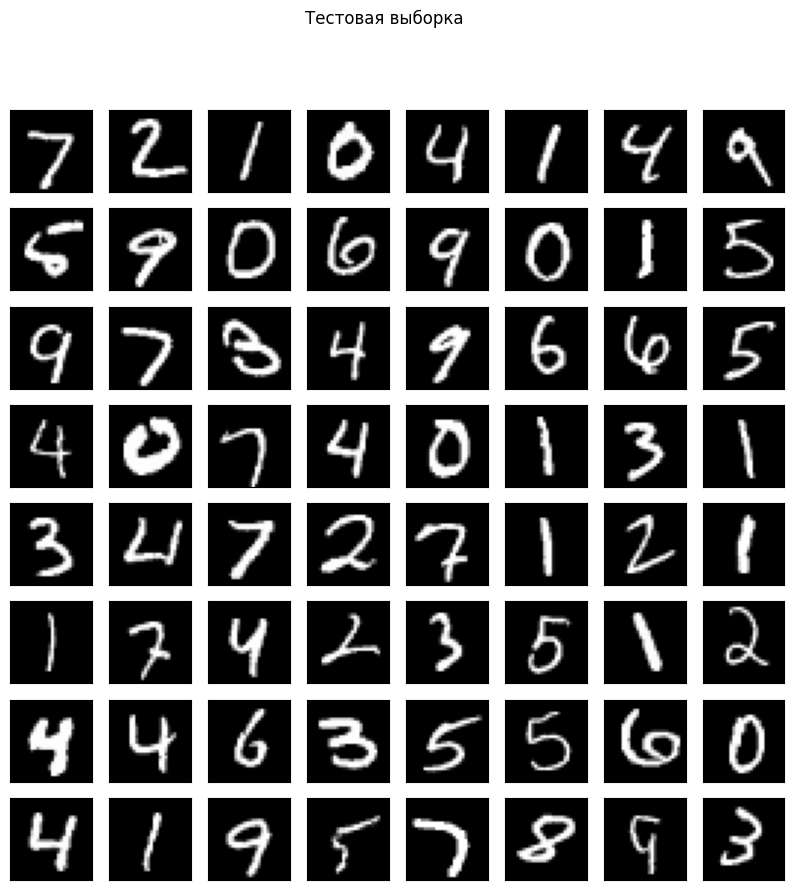

In [49]:
fig, axes = plt.subplots(8, 8, figsize = (10, 10))
fig.suptitle('Тестовая выборка')
plt.setp(plt.gcf().get_axes(), xticks = [], yticks = [])
for i, ax in enumerate(axes.flat):
    img = x_test[i]
    ax.imshow(img, cmap = 'gray', vmin=0, vmax=255)

# 2. Обработка данных

In [50]:
print('Размерность входных данных тренировочной выборки:', x_train.shape)
print('Размерность входных данных тестовой выборки:', x_test.shape)
print()
print('Размерность откликов тренировочной выборки:', y_train.shape)
print('Размерность откликов тестовой выборки:', y_test.shape)

Размерность входных данных тренировочной выборки: (60000, 28, 28)
Размерность входных данных тестовой выборки: (10000, 28, 28)

Размерность откликов тренировочной выборки: (60000,)
Размерность откликов тестовой выборки: (10000,)


In [51]:
w = x_train.shape[1]
h = x_train.shape[2]

x_train_new = x_train.reshape(x_train.shape[0], w * h)
x_test_new = x_test.reshape(x_test.shape[0], w * h)

x_train_new = x_train_new.astype('float32') / 255
x_test_new = x_test_new.astype('float32') / 255

y_train_new = np.eye(10)[y_train]
y_test_new = np.eye(10)[y_test]

In [52]:
print('Размерность входных данных тренировочной выборки:', x_train_new.shape)
print('Размерность входных данных тестовой выборки:', x_test_new.shape, '\n')
print('Размерность откликов тренировочной выборки:', y_train_new.shape)
print('Размерность откликов тестовой выборки:', y_test_new.shape)

Размерность входных данных тренировочной выборки: (60000, 784)
Размерность входных данных тестовой выборки: (10000, 784) 

Размерность откликов тренировочной выборки: (60000, 10)
Размерность откликов тестовой выборки: (10000, 10)


# 3. Построение модели нейронной сети

In [53]:
class FC_Network:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = 0.01 * np.random.rand(input_size, hidden_size)
        self.w2 = 0.01 * np.random.rand(hidden_size, output_size)
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        self.r = np.ones((output_size, 1))

    def ReLU(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / (np.dot(exp_x, self.r))

    def cross_entropy(self, u, y):
        return np.mean(-y * np.log(u))

    def accuracy(self, u, y):
        return np.mean(np.argmax(u, axis = 1) == np.argmax(y, axis = 1))

    def forward(self, x):
        self.f = np.dot(x, self.w1) + self.b1
        self.v = self.ReLU(self.f)
        self.g = np.dot(self.v, self.w2) + self.b2
        self.u = self.softmax(self.g)
        return self.u

    def backward(self, x, y, learning_rate):
        delta2 = (self.u - y) / self.u.shape[0]
        d_w2 = np.dot(self.v.T, delta2)
        d_ReLU = np.where(self.f > 0, 1, 0)
        delta1 = np.dot(delta2, self.w2.T) * d_ReLU
        d_w1 = np.dot(x.T, delta1)
        d_b2 = np.sum(delta2, axis=0, keepdims=True)
        d_b1 = np.sum(delta1, axis=0, keepdims=True)
        self.w2 -= learning_rate * d_w2
        self.w1 -= learning_rate * d_w1
        self.b2 -= learning_rate * d_b2
        self.b1 -= learning_rate * d_b1

    def predict_class(self, x):
        f = np.dot(x, self.w1) + self.b1
        v = self.ReLU(f)
        g = np.dot(v, self.w2) + self.b2
        u = self.softmax(g)
        return np.argmax(u, axis=1)[0]

In [54]:
def train(net, x, y, epochs, batch_size = 32, learning_rate = 0.1):
    start_time = time.time()
    for epoch in range(epochs):
            start_epoch = time.time()
            for i in range(0, len(x), batch_size):
                x_curr = x[i : i + batch_size]
                y_curr = y[i : i + batch_size]
                net.forward(x_curr)
                net.backward(x_curr, y_curr, learning_rate)
            u = net.forward(x)
            end_epoch = time.time() - start_epoch
            acc = net.accuracy(u, y)
            print('Эпоха ', epoch + 1, ': Точность = ', acc, ', Ошибка = ', 1 - acc, '\nВремя: ', end_epoch, ' сек.\n')
    total_time = time.time() - start_time
    print('Суммарное время:', total_time)

# 4. Обучение сети

In [55]:
net = FC_Network(784, 300, 10)
train(net, x_train_new, y_train_new, 20)

Эпоха  1 : Точность =  0.9311666666666667 , Ошибка =  0.0688333333333333 
Время:  8.067872047424316  сек.

Эпоха  2 : Точность =  0.9580333333333333 , Ошибка =  0.04196666666666671 
Время:  6.014526844024658  сек.

Эпоха  3 : Точность =  0.9688666666666667 , Ошибка =  0.031133333333333346 
Время:  7.85570764541626  сек.

Эпоха  4 : Точность =  0.9755333333333334 , Ошибка =  0.024466666666666637 
Время:  6.520433664321899  сек.

Эпоха  5 : Точность =  0.98045 , Ошибка =  0.019549999999999956 
Время:  7.118197917938232  сек.

Эпоха  6 : Точность =  0.9846 , Ошибка =  0.01539999999999997 
Время:  7.1994006633758545  сек.

Эпоха  7 : Точность =  0.9871166666666666 , Ошибка =  0.012883333333333358 
Время:  6.269366979598999  сек.

Эпоха  8 : Точность =  0.9888333333333333 , Ошибка =  0.011166666666666658 
Время:  7.642261743545532  сек.

Эпоха  9 : Точность =  0.9904 , Ошибка =  0.009600000000000053 
Время:  6.204399585723877  сек.

Эпоха  10 : Точность =  0.9915666666666667 , Ошибка =  0.0

# 5. Точность на тестовой выборке

In [56]:
u_test = net.forward(x_test_new)
print('Точность :', net.accuracy(u_test, y_test_new))

Точность : 0.9808
